# Exploração Inicial do Dataset Fashion MNIST

Neste notebook, vamos explorar o dataset Fashion MNIST e testar nossa implementação de MLP. Primeiro vamos carregar as bibliotecas necessárias e os dados.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
train = pd.read_csv('data/fashion_train.csv')
test = pd.read_csv('data/fashion_test.csv')

print(f"Formato do conjunto de treinamento: {train.shape}")
print(f"Formato do conjunto de teste: {test.shape}")

Formato do conjunto de treinamento: (60000, 785)
Formato do conjunto de teste: (10000, 785)


In [45]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


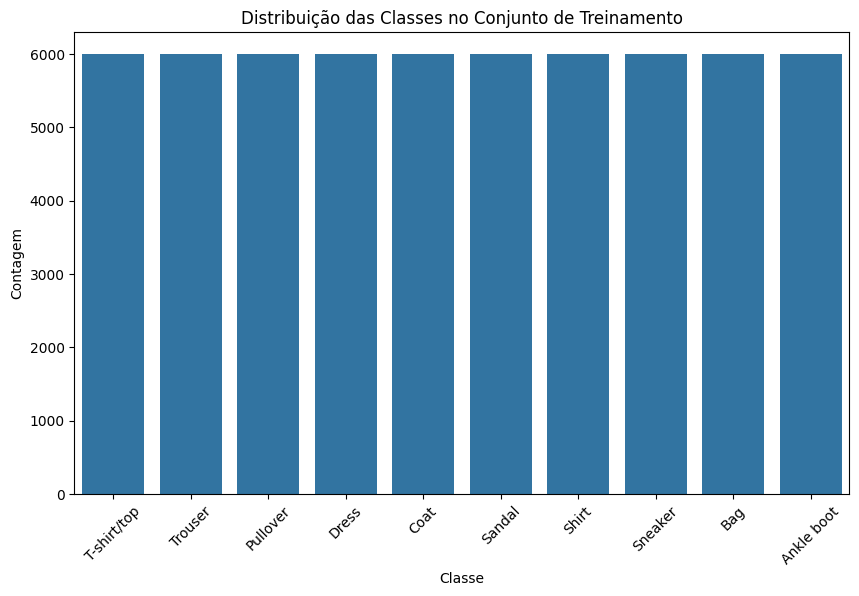

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train)
plt.title('Distribuição das Classes no Conjunto de Treinamento')
plt.xlabel('Classe')
plt.ylabel('Contagem')

# Mapear rótulos para nomes das classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.xticks(range(10), class_names, rotation=45)
plt.show()

## Visualização de Exemplos

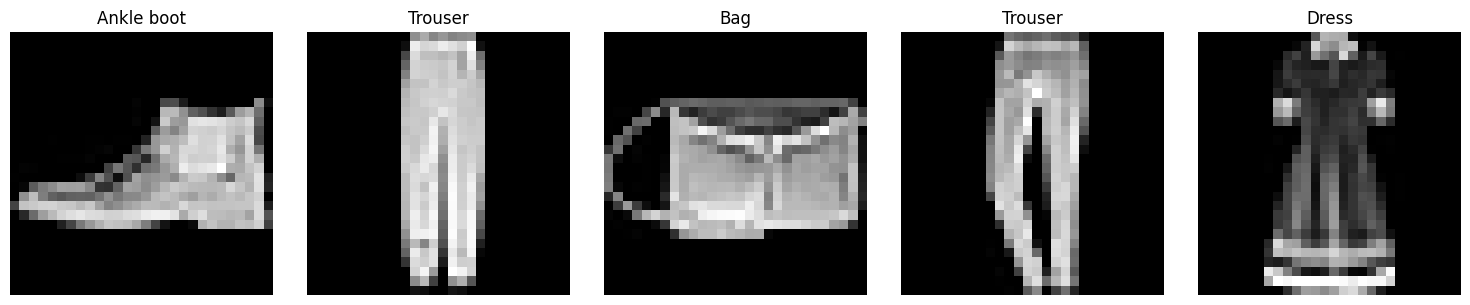

In [47]:
def plot_examples(data, labels, num_examples=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i+1)
        # Converter vetor para matriz 28x28
        img = data.iloc[i, 1:].values.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(class_names[labels.iloc[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar 5 exemplos aleatórios
random_indices = np.random.randint(0, len(train), 5)
plot_examples(train.iloc[random_indices], train.iloc[random_indices]['label'])

## Preparação dos Dados

Vamos preparar os dados para treinamento:

In [48]:
train = np.array(train)
train.shape

(60000, 785)

In [49]:
Xtrain = train[:, 1:]
Ytrain = train[:, :1]
Xtrain.shape, Ytrain.shape

((60000, 784), (60000, 1))

### Normalização

In [50]:
Xtrain = Xtrain / 255.0
Xtrain[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## MLP

In [51]:
input_size = 28 * 28  # 28x28 imagens = 784 neurônios na camada de entrada
hidden_size = 256  # Camada oculta com 256 neurônios
output_size = 10  # labels

# Inicialização dos pesos - usando escala 1/sqrt(n) para melhor convergência
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1/input_size)
b1 = np.zeros(hidden_size)  # Bias para a camada oculta
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1/hidden_size)
b2 = np.zeros(output_size)  # Bias para a camada de saída

def relu(x):
    return np.maximum(0, x)

# Forward pass
z1 = np.dot(Xtrain, W1) + b1  # Produto escalar (Xtrain @ W1) + b1
a1 = relu(z1)  # Aplicando ativação ReLU - isso estava faltando

output = np.dot(a1, W2) + b2  # Produto escalar (a1 @ W2) + b2

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Subtração para estabilidade numérica
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

probs = softmax(output)

parameters = [W1, W2, b1, b2]

In [52]:
total_params = sum(p.size for p in [W1, W2, b1, b2])
print(f"Total de parâmetros na rede: {total_params}")

Total de parâmetros na rede: 203530


In [53]:
def one_hot_encode(y, num_classes=10):
    y_one_hot = np.zeros((y.shape[0], num_classes))
    y_one_hot[np.arange(y.shape[0]), y.flatten()] = 1
    return y_one_hot

def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[np.arange(m), y_true.flatten()])
    return np.mean(log_likelihood)

def calculate_accuracy(y_pred, y_true):
    predicted_class = np.argmax(y_pred, axis=1)
    true_class = y_true.flatten()
    return np.mean(predicted_class == true_class) * 100

In [54]:
epochs = 100
learning_rate = 0.01
batch_size = 128
losses = []
accuracies = []
steps = []

# One-hot encode labels
y_one_hot = one_hot_encode(Ytrain)

# Mini-batch gradient descent
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    num_batches = int(np.ceil(Xtrain.shape[0] / batch_size))

    for i in range(num_batches):
        # Get mini-batch
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, Xtrain.shape[0])
        X_batch = Xtrain[start_idx:end_idx]
        y_batch = Ytrain[start_idx:end_idx]

        # Forward pass
        # Hidden layer
        z1 = np.dot(X_batch, W1) + b1
        a1 = relu(z1)
        # Output layer
        z2 = np.dot(a1, W2) + b2
        probs_batch = softmax(z2)

        # Compute loss and accuracy
        batch_loss = cross_entropy_loss(probs_batch, y_batch)
        batch_accuracy = calculate_accuracy(probs_batch, y_batch)
        epoch_loss += batch_loss
        epoch_accuracy += batch_accuracy

        # Backward pass
        # Gradient of loss with respect to output
        dz2 = probs_batch.copy()
        dz2[np.arange(y_batch.shape[0]), y_batch.flatten()] -= 1
        dz2 /= y_batch.shape[0]

        # Gradients for W2 and b2
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0)

        # Gradient for hidden layer
        da1 = np.dot(dz2, W2.T)
        dz1 = da1 * (z1 > 0)  # ReLU derivative

        # Gradients for W1 and b1
        dW1 = np.dot(X_batch.T, dz1)
        db1 = np.sum(dz1, axis=0)

        # Update parameters
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    avg_loss = epoch_loss / num_batches
    avg_accuracy = epoch_accuracy / num_batches
    losses.append(avg_loss)
    accuracies.append(avg_accuracy)
    steps.append(epoch)

    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Training Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.2f}%')

Epoch: 0, Training Loss: 1.1598, Accuracy: 65.59%
Epoch: 10, Training Loss: 0.4650, Accuracy: 84.08%
Epoch: 20, Training Loss: 0.4163, Accuracy: 85.54%
Epoch: 30, Training Loss: 0.3876, Accuracy: 86.60%
Epoch: 40, Training Loss: 0.3667, Accuracy: 87.30%
Epoch: 50, Training Loss: 0.3503, Accuracy: 87.85%
Epoch: 60, Training Loss: 0.3365, Accuracy: 88.30%
Epoch: 70, Training Loss: 0.3243, Accuracy: 88.72%
Epoch: 80, Training Loss: 0.3134, Accuracy: 89.08%
Epoch: 90, Training Loss: 0.3035, Accuracy: 89.42%


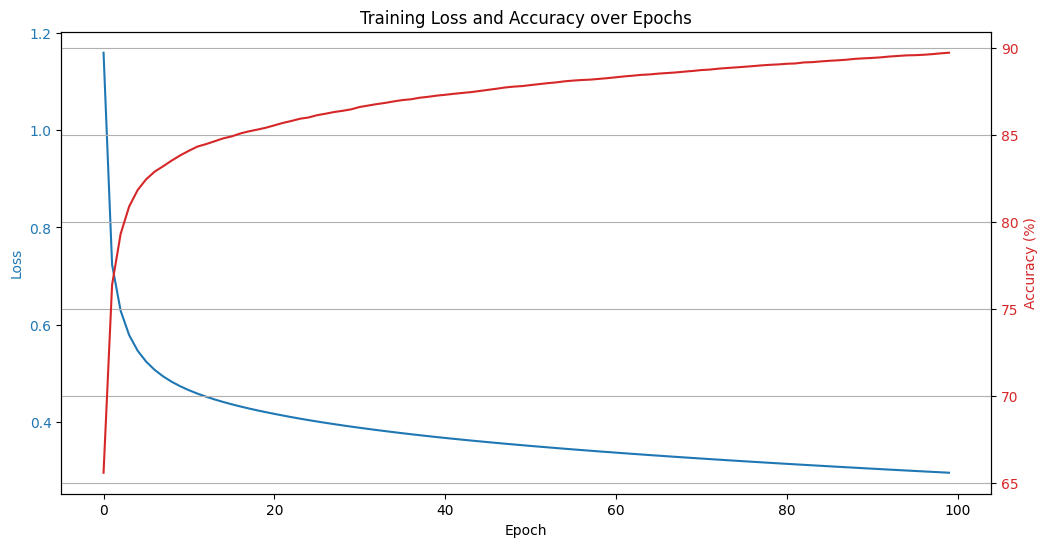

In [55]:
# Plot the loss and accuracy curves
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(steps, losses, color='tab:blue', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy (%)', color='tab:red')
ax2.plot(steps, accuracies, color='tab:red', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Training Loss and Accuracy over Epochs')
plt.grid(True)
plt.show()

## Avaliação no Conjunto de Teste

Vamos avaliar o desempenho do nosso modelo no conjunto de teste:

Perda no conjunto de teste: 0.3315
Acurácia no conjunto de teste: 88.25%


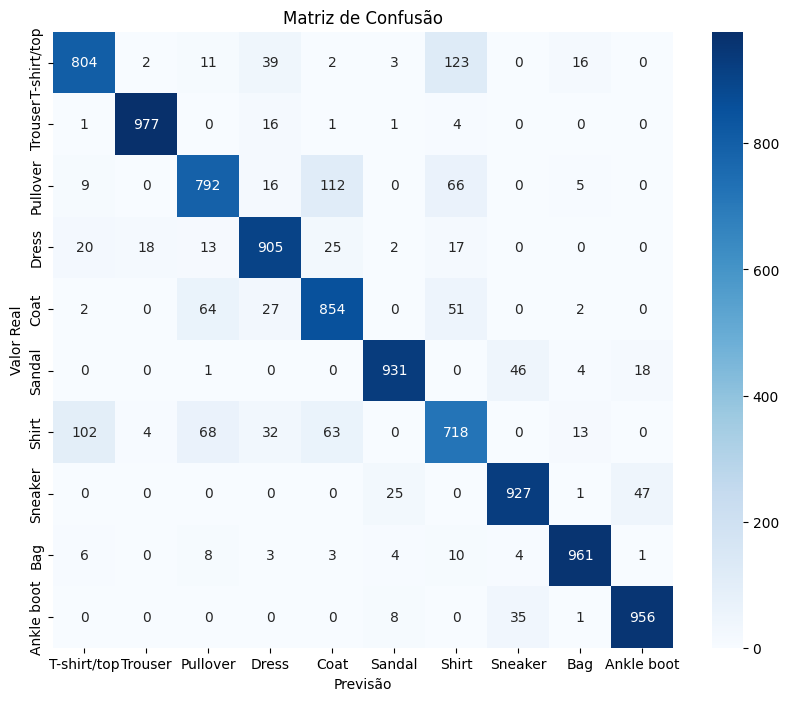

In [56]:
test_np = np.array(test)
Xtest = test_np[:, 1:] / 255.0  # Normalizar
Ytest = test_np[:, :1]

# Forward pass para o conjunto de teste
z1_test = np.dot(Xtest, W1) + b1
a1_test = relu(z1_test)
z2_test = np.dot(a1_test, W2) + b2
probs_test = softmax(z2_test)

# Calcular acurácia e perda no teste
test_loss = cross_entropy_loss(probs_test, Ytest)
test_accuracy = calculate_accuracy(probs_test, Ytest)

print(f'Perda no conjunto de teste: {test_loss:.4f}')
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}%')

# Matriz de confusão
y_pred = np.argmax(probs_test, axis=1)
cm = confusion_matrix(Ytest, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()